## Exercise 9.5: Singular values

- Generate an n × n matrix, denoted by C, where each entry is 1 with probability p and 0 otherwise. Use the linear algebra library of Scipy to compute the singular values of C. What can you say about the relationship between n, p and the largest singular value?

In [72]:
import numpy as np

n = 666
C = np.random.rand(n,n)
p = 0.6
C = (C < p) * 1.0
largest_singular = np.linalg.norm(C, 2)
print(largest_singular)

400.4035265101526


- We can see that n * p is approximately equal largest singular value.

# 10. Scipy

## Exercise 10.1: Least squares

- Generate matrix A ∈ Rm×n with m > n. Also generate some vector b ∈ Rm. Now find x = arg minx ∥Ax − b∥2. Print the norm of the residual.

In [71]:
from scipy.linalg import lstsq

In [9]:
m = 5
n = 3

A = np.random.rand(m, n)
B = np.random.rand(m, 1)

X, residues, rank, s = lstsq(A, B)
print("residues = ", residues)

residues =  [0.39780865]


## Exercise 10.2: Optimization

- Find the maximum of the function
- f(x) = sin2(x − 2)e−x2

In [18]:
from scipy.optimize import fmin
import numpy as np

def f(x): 
    y = ((np.sin(x-2)) ** 2) * np.exp(-x ** 2)
    return y

max_value = fmin(lambda x: -f(x), 0)
print(max_value)

Optimization terminated successfully.
         Current function value: -0.911685
         Iterations: 20
         Function evaluations: 40
[0.21625]


## Exercise 10.3: Pairwise distances

- Let X be a matrix with n rows and m columns. How can you compute the pairwise distances between every two rows?
- As an example application, consider n cities, and we are given their coordinates in two columns. Now we want a nice table that tells us for each two cities, how far they are apart.
- Again, make sure you make use of Scipy’s functionality instead of writing your own routine.


#### Answer

- I can compute pairwise distances between every two rows by Euclidian Distance. The idea is that we first calculate the H(x) histogram of our M integers; where H(x) is the number of times the value x appears in our input (if all M is different it will be 0 or 1 - but this is not necessary).

- Then what we want to calculate is A(d), where A(d) is defined as the number of pairs of integers spaced exactly d.

- This can be calculated as A(d) = sum(H(x)*H(x+d) for all x)

- This type of function is called a convolution and can be computed efficiently by taking the Fourier transform, multiplying the output with itself, and then calculating the inverse transform.

With Scipy: scipy.signal.fftconvolve

# 11. Matplotlib

## Exercise 11.1: Plotting a function

- Plot the function over the interval [0, 2]. Add proper axis labels, a title, etc.
- f(x) = sin2(x − 2)e−x2

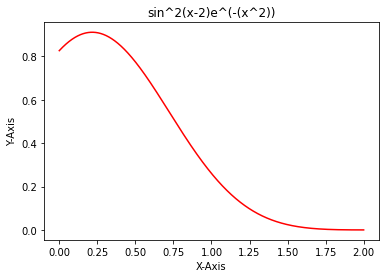

In [20]:
import matplotlib.pyplot as plt

x_values = np.arange(0, 2, 0.00001, dtype = float)
plt.plot(x_values, f(x_values), 'r-')
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("sin^2(x-2)e^(-(x^2))")
plt.show()

## Exercise 11.2: Data

- Create a data matrix X with 20 observations of 10 variables. Generate a vector b with parameters Then generate the response vector y = Xb+z where z is a vector with standard normally distributed variables. Now (by only using y and X), find an estimator for b, by solving ˆb = arg min ∥Xb − y∥2 b

- Plot the true parameters b and estimated parameters ˆb. See Figure 1 for an example plot.


(20, 1)
Optimization terminated successfully.
         Current function value: 19.297419
         Iterations: 174
         Function evaluations: 306


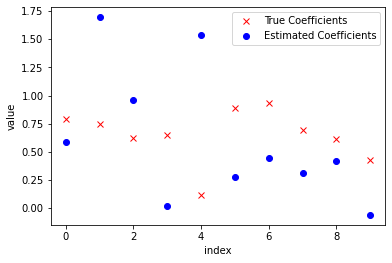

In [24]:
X = np.random.rand(20,10)
b = np.random.rand(10,1)
z = np.random.randn(20,1)
y = X.dot(b) + z
print(y.shape)

def f(x):
    return np.linalg.norm(X.dot(x) - y, 2)

x0 = np.random.rand(10,1)

B_optim = fmin(lambda x: f(x), x0)

line_up, = plt.plot(range(len(b)), b, 'rx')
line_down, = plt.plot(range(len(b)), B_optim, 'bo')

plt.xlabel('index')
plt.ylabel('value')

plt.legend([line_up, line_down], ['True Coefficients', 'Estimated Coefficients'])
plt.show()

## Exercise 11.3: Histogram and density estimation

- Generate a vector z of 10000 observations from your favorite exotic distribution. Then make a plot that shows a histogram of z (with 25 bins), along with an estimate for the density, using a Gaussian kernel density estimator (see scipy.stats). See Figure 2 for an example plot

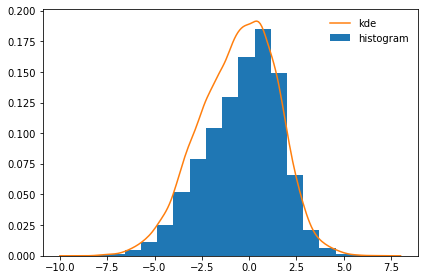

In [70]:
num_samples = 10000
xmin, xmax = -10, 8

gaussian_weights = np.array([2, 1], dtype=np.float)
gaussian_weights /= np.sum(gaussian_weights)

gaussian_means = np.array([-1, 1])
gaussian_std = np.array([2, 1])

gaussian_observation = np.array([1, .5])

gaussian_samples = np.random.multinomial(num_samples, gaussian_weights)
samples = []
weights = []

for n, m, s, o in zip(gaussian_samples, gaussian_means, gaussian_std, gaussian_observation):
    _samples = np.random.normal(m, s, n)
    _samples = _samples[o > np.random.uniform(size=n)]
    samples.extend(_samples)
    weights.extend(np.ones_like(_samples) / o)

weights = np.array(weights, np.float)
weights /= np.sum(weights)
samples = np.array(samples)

# Plot histogram
plt.hist(samples, bins, (xmin, xmax), histtype='stepfilled', 
        label='histogram', weights=weights)

# Generate KDE
pdf = gaussian_kde(samples)
y = pdf(x)
plt.plot(x, y, label='kde')

plt.legend(loc='best', frameon=False)
plt.tight_layout()
plt.show()